In [1]:
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

print(spark)
print(sc)

import pyspark.sql.functions as f
from pyspark.sql.functions import *
from pyspark.sql.types import *

<SparkContext master=local[*] appName=pyspark-shell>


In [2]:
print(type(spark))
print(type(sc))
pd.set_option('display.max_rows', 500)


<class 'pyspark.sql.session.SparkSession'>
<class 'pyspark.context.SparkContext'>


In [3]:
df1 = spark.read.options(header="true",inferSchema="true",sep=",",escape="\"",multiLine="True", nullValue="NA").csv("glassdoor_jobs_data.csv")

#df1 = spark.read.options(header="true",inferSchema="true",sep=",",multiLine="True", nullValue="NA").csv("glassdoor_jobs_data1.csv")



In [4]:
df1.select("*").show(3)

+---+--------------------+--------------------+--------------------+------+--------------------+---------------+--------------+--------------------+-------+------------------+--------------------+-------------------+--------------------+-----------+
|_c0|           Job Title|     Salary Estimate|     Job Description|Rating|        Company Name|       Location|  Headquarters|                Size|Founded| Type of ownership|            Industry|             Sector|             Revenue|Competitors|
+---+--------------------+--------------------+--------------------+------+--------------------+---------------+--------------+--------------------+-------+------------------+--------------------+-------------------+--------------------+-----------+
|  0|      Data Scientist|$53K-$91K (Glassd...|Data Scientist
Lo...|   3.8|Tecolote Research...|Albuquerque, NM|    Goleta, CA|501 to 1000 emplo...|   1973| Company - Private| Aerospace & Defense|Aerospace & Defense|$50 to $100 milli...|         -1|


In [5]:
df1.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Salary Estimate: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Company Name: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Headquarters: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Founded: integer (nullable = true)
 |-- Type of ownership: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Sector: string (nullable = true)
 |-- Revenue: string (nullable = true)
 |-- Competitors: string (nullable = true)



In [6]:
def spark_shape(self):
    return (self.count(), len(self.columns))

pyspark.sql.dataframe.DataFrame.shape = spark_shape

In [7]:
df1.shape()

(956, 15)

In [8]:
print(df1.columns)

['_c0', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']


In [9]:
df1.select("Job Title").show(5)

+--------------------+
|           Job Title|
+--------------------+
|      Data Scientist|
|Healthcare Data S...|
|      Data Scientist|
|      Data Scientist|
|      Data Scientist|
+--------------------+
only showing top 5 rows



In [10]:
df1.select("Job Description").show(5)

+--------------------+
|     Job Description|
+--------------------+
|Data Scientist
Lo...|
|What You Will Do:...|
|KnowBe4, Inc. is ...|
|*Organization and...|
|Data Scientist
Af...|
+--------------------+
only showing top 5 rows



In [11]:
df1.select("Job Description",f.length("Job Description"),f.length(f.ltrim(f.rtrim(col("Job Description"))))).show(5)

+--------------------+-----------------------+-------------------------------------+
|     Job Description|length(Job Description)|length(ltrim(rtrim(Job Description)))|
+--------------------+-----------------------+-------------------------------------+
|Data Scientist
Lo...|                   2548|                                 2548|
|What You Will Do:...|                   4857|                                 4857|
|KnowBe4, Inc. is ...|                   3462|                                 3462|
|*Organization and...|                   3883|                                 3883|
|Data Scientist
Af...|                   2743|                                 2743|
+--------------------+-----------------------+-------------------------------------+
only showing top 5 rows



In [12]:
df1.select("Company Name",f.length("Company Name")).show(5)

+--------------------+--------------------+
|        Company Name|length(Company Name)|
+--------------------+--------------------+
|Tecolote Research...|                  21|
|University of Mar...|                  41|
|         KnowBe4
4.8|                  11|
|            PNNL
3.8|                   8|
|Affinity Solution...|                  22|
+--------------------+--------------------+
only showing top 5 rows



In [13]:
job_desc=df1.select("Job Description").rdd.flatMap(lambda x: x).collect()

In [14]:
print(type(job_desc))

<class 'list'>


In [15]:
len(job_desc[0])

2548

In [16]:
print(job_desc[0])

Data Scientist
Location: Albuquerque, NM
Education Required: Bachelorâ€™s degree required, preferably in math, engineering, business, or the sciences.
Skills Required:
Bachelorâ€™s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three yearsâ€™ experience credit for Masterâ€™s degree; five yearsâ€™ experience credit for a Ph.D
Applicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoint, Excel, and working knowledge of MS Access, LMS, SAS, data visualization tools, and have a strong algorithmic aptitude
Excellent verbal and written communication skills, and quantitative analytical skills are required
Applicant must be able to work in a team environment
U.S. citizenship and ability to obtain a DoD Secret Clearance required
Responsibilities: The applicant will be responsible for formulating analytical solutions to complex data problems; creating data analytic models to improve data

In [17]:
sal_est=df1.select("Salary Estimate").rdd.flatMap(lambda x: x).collect()

In [18]:
j=0
for i in sal_est:
    if "per hour" in i.lower():
        j=j+1
        print(j,"  ",i)

1    $17-$24 Per Hour(Glassdoor est.)
2    $21-$34 Per Hour(Glassdoor est.)
3    $18-$25 Per Hour(Glassdoor est.)
4    $21-$34 Per Hour(Glassdoor est.)
5    $15-$25 Per Hour(Glassdoor est.)
6    $17-$24 Per Hour(Glassdoor est.)
7    $21-$34 Per Hour(Glassdoor est.)
8    $18-$25 Per Hour(Glassdoor est.)
9    $24-$39 Per Hour(Glassdoor est.)
10    $21-$34 Per Hour(Glassdoor est.)
11    Employer Provided Salary:$25-$28 Per Hour
12    $21-$29 Per Hour(Glassdoor est.)
13    $10-$17 Per Hour(Glassdoor est.)
14    $18-$25 Per Hour(Glassdoor est.)
15    $24-$39 Per Hour(Glassdoor est.)
16    $21-$34 Per Hour(Glassdoor est.)
17    Employer Provided Salary:$25-$28 Per Hour
18    $21-$29 Per Hour(Glassdoor est.)
19    $10-$17 Per Hour(Glassdoor est.)
20    $27-$47 Per Hour(Glassdoor est.)
21    $18-$25 Per Hour(Glassdoor est.)
22    $24-$39 Per Hour(Glassdoor est.)
23    $21-$34 Per Hour(Glassdoor est.)
24    Employer Provided Salary:$25-$28 Per Hour


In [19]:
print(len(sal_est))
print(type(sal_est))

956
<class 'list'>


In [20]:
#df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)

def salary_est_hours(x):
    if "per hour" in x.lower():
        return 1
    else:
        return 0

In [21]:
salary_est_hours = spark.udf.register("salary_est_hours", salary_est_hours)

df1=df1.withColumn('hourly',salary_est_hours(col("Salary Estimate")))

In [22]:
df1.select("hourly").distinct().show()

+------+
|hourly|
+------+
|     0|
|     1|
+------+



In [23]:
df1.select("hourly").groupBy('hourly').count().show()

+------+-----+
|hourly|count|
+------+-----+
|     0|  932|
|     1|   24|
+------+-----+



In [24]:
def salary_est_hourly(x):
    if "per hour" in x.lower():
        return 1
    else:
        return 0

In [25]:
salary_udf_hourly = f.udf(lambda row: salary_est_hourly(row), IntegerType())

In [26]:
salary = df1.withColumn("hourly_sal", salary_udf_hourly(col("Salary Estimate")))

salary.select("hourly_sal").groupBy('hourly_sal').count().show()

+----------+-----+
|hourly_sal|count|
+----------+-----+
|         1|   24|
|         0|  932|
+----------+-----+



In [27]:
print(df1.columns)

['_c0', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly']


In [28]:
#df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

def employer_provided(x):
    if "employer provided salary:" in x.lower():
        return 1
    else:
        return 0

In [29]:
employer_provided = spark.udf.register("employer_provided", employer_provided)

df1=df1.withColumn('employer_provided',employer_provided(col("Salary Estimate")))

In [30]:
df1.select("employer_provided").groupBy('employer_provided').count().show()

+-----------------+-----+
|employer_provided|count|
+-----------------+-----+
|                0|  939|
|                1|   17|
+-----------------+-----+



In [31]:
def employer_provide(x):
    if "employer provided salary:" in x.lower():
        return 1
    else:
        return 0

In [32]:
employer_pro = f.udf(lambda row: employer_provide(row), IntegerType())

In [33]:
emp_pro_sal = df1.withColumn("emp_sal", employer_pro(col("Salary Estimate")))

In [34]:
emp_pro_sal.select("emp_sal").groupBy('emp_sal').count().show()

+-------+-----+
|emp_sal|count|
+-------+-----+
|      1|   17|
|      0|  939|
+-------+-----+



In [35]:
print(df1.columns)

['_c0', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly', 'employer_provided']


In [36]:
df1.filter(col('Salary Estimate') == '-1').shape()

(214, 17)

In [37]:
# we need to remove those record which salary is -1

df2 = df1.filter(col('Salary Estimate') != '-1')

In [38]:
df2.shape()

(742, 17)

In [39]:
df2.select("Salary Estimate").show(5)

+--------------------+
|     Salary Estimate|
+--------------------+
|$53K-$91K (Glassd...|
|$63K-$112K (Glass...|
|$80K-$90K (Glassd...|
|$56K-$97K (Glassd...|
|$86K-$143K (Glass...|
+--------------------+
only showing top 5 rows



In [40]:
# parse and clean the salary after removing space, (, ), and $    
#salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

df3=df2.withColumn('salary',f.split(col("Salary Estimate"),"\(")[0])

In [41]:
df3.select("Salary Estimate","salary").show(4)

+--------------------+-----------+
|     Salary Estimate|     salary|
+--------------------+-----------+
|$53K-$91K (Glassd...| $53K-$91K |
|$63K-$112K (Glass...|$63K-$112K |
|$80K-$90K (Glassd...| $80K-$90K |
|$56K-$97K (Glassd...| $56K-$97K |
+--------------------+-----------+
only showing top 4 rows



In [42]:
df3.select("salary").groupBy("salary").count().sort(desc("count")).show(5)

+----------------+-----+
|          salary|count|
+----------------+-----+
|$21-$34 Per Hour|    6|
|     $86K-$143K |    6|
|     $49K-$113K |    6|
|     $54K-$115K |    6|
|    $107K-$173K |    5|
+----------------+-----+
only showing top 5 rows



In [43]:
#minus_Kd = salary.apply(lambda x: x.replace('K','').replace('$',''))
df4=df3.withColumn('salary1',regexp_replace(col("salary"),'K','')).withColumn('salary1',regexp_replace(col("salary1"),'\$',''))


In [44]:
df4.select("salary1").show(5)

+-------+
|salary1|
+-------+
| 53-91 |
|63-112 |
| 80-90 |
| 56-97 |
|86-143 |
+-------+
only showing top 5 rows



In [45]:
df4.select("Salary Estimate","salary","salary1").show(4)

+--------------------+-----------+-------+
|     Salary Estimate|     salary|salary1|
+--------------------+-----------+-------+
|$53K-$91K (Glassd...| $53K-$91K | 53-91 |
|$63K-$112K (Glass...|$63K-$112K |63-112 |
|$80K-$90K (Glassd...| $80K-$90K | 80-90 |
|$56K-$97K (Glassd...| $56K-$97K | 56-97 |
+--------------------+-----------+-------+
only showing top 4 rows



In [46]:
#minus_Kd.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))

df4=df4.withColumn('salary1',regexp_replace(lower(col("salary1")),'per hour','')).withColumn('salary1',regexp_replace(lower(col("salary1")),'employer provided salary:',''))

In [47]:
df4.select("Salary Estimate","salary","salary1").show(4)

+--------------------+-----------+-------+
|     Salary Estimate|     salary|salary1|
+--------------------+-----------+-------+
|$53K-$91K (Glassd...| $53K-$91K | 53-91 |
|$63K-$112K (Glass...|$63K-$112K |63-112 |
|$80K-$90K (Glassd...| $80K-$90K | 80-90 |
|$56K-$97K (Glassd...| $56K-$97K | 56-97 |
+--------------------+-----------+-------+
only showing top 4 rows



In [48]:
df4=df4.withColumn('min_salary',split(col("salary1"),"-")[0])
df4=df4.withColumn('max_salary',split(col("salary1"),"-")[1])

In [49]:
print(df4.columns)

['_c0', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly', 'employer_provided', 'salary', 'salary1', 'min_salary', 'max_salary']


In [50]:
df4=df4.withColumn('avg_salary',(col("max_salary")+col("min_salary"))/2)

In [51]:
df4.select("Salary Estimate","salary","salary1","min_salary","max_salary","avg_salary").show(4)

+--------------------+-----------+-------+----------+----------+----------+
|     Salary Estimate|     salary|salary1|min_salary|max_salary|avg_salary|
+--------------------+-----------+-------+----------+----------+----------+
|$53K-$91K (Glassd...| $53K-$91K | 53-91 |        53|       91 |      72.0|
|$63K-$112K (Glass...|$63K-$112K |63-112 |        63|      112 |      87.5|
|$80K-$90K (Glassd...| $80K-$90K | 80-90 |        80|       90 |      85.0|
|$56K-$97K (Glassd...| $56K-$97K | 56-97 |        56|       97 |      76.5|
+--------------------+-----------+-------+----------+----------+----------+
only showing top 4 rows



In [52]:
#df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-3], axis = 1)

def company_text(x,y):
    if y < 0 and len(y)>0:
        return x
    elif len(x)==0:
        return "blank"
    elif y > 0 and len(x)>3:
        return x[:-3]    #substring_index(x,"\n", -3)
    else:
        return 1 
        

In [53]:
company_text = spark.udf.register("company_text", company_text)

In [54]:
type(df4)

pyspark.sql.dataframe.DataFrame

In [55]:
rate=df4.withColumn('company_txt',company_text(col("Company Name"),col("Rating"))).select("Company Name","Rating","company_txt")

In [56]:
rate.select(f.length("Company Name"),f.length("company_txt")).show(5)

+--------------------+-------------------+
|length(Company Name)|length(company_txt)|
+--------------------+-------------------+
|                  21|                 18|
|                  41|                 38|
|                  11|                  8|
|                   8|                  5|
|                  22|                 19|
+--------------------+-------------------+
only showing top 5 rows



In [57]:
rate.show(4)

+--------------------+------+--------------------+
|        Company Name|Rating|         company_txt|
+--------------------+------+--------------------+
|Tecolote Research...|   3.8|  Tecolote Research
|
|University of Mar...|   3.4|University of Mar...|
|         KnowBe4
4.8|   4.8|            KnowBe4
|
|            PNNL
3.8|   3.8|               PNNL
|
+--------------------+------+--------------------+
only showing top 4 rows



In [58]:
df5=df4.withColumn('company_txt',company_text(col("Company Name"),col("Rating")))

In [59]:
df5.select(f.length("Company Name"),f.length("company_txt")).show(5)

+--------------------+-------------------+
|length(Company Name)|length(company_txt)|
+--------------------+-------------------+
|                  21|                 18|
|                  41|                 38|
|                  11|                  8|
|                   8|                  5|
|                  22|                 19|
+--------------------+-------------------+
only showing top 5 rows



In [60]:
df5.select("Company Name","company_txt").show(4,False)

+-----------------------------------------+--------------------------------------+
|Company Name                             |company_txt                           |
+-----------------------------------------+--------------------------------------+
|Tecolote Research
3.8                    |Tecolote Research
                    |
|University of Maryland Medical System
3.4|University of Maryland Medical System
|
|KnowBe4
4.8                              |KnowBe4
                              |
|PNNL
3.8                                 |PNNL
                                 |
+-----------------------------------------+--------------------------------------+
only showing top 4 rows



In [61]:
print(df5.columns)

['_c0', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly', 'employer_provided', 'salary', 'salary1', 'min_salary', 'max_salary', 'avg_salary', 'company_txt']


In [62]:
df5.select("Location",split(col("Location"),",")[1]).show(4)

+---------------+---------------------+
|       Location|split(Location, ,)[1]|
+---------------+---------------------+
|Albuquerque, NM|                   NM|
|  Linthicum, MD|                   MD|
| Clearwater, FL|                   FL|
|   Richland, WA|                   WA|
+---------------+---------------------+
only showing top 4 rows



In [63]:
#state field 
#df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1])

df5=df5.withColumn('job_state',split(col("Location"),",")[1])

In [64]:
df5.select("Location",'job_state').show(4)

+---------------+---------+
|       Location|job_state|
+---------------+---------+
|Albuquerque, NM|       NM|
|  Linthicum, MD|       MD|
| Clearwater, FL|       FL|
|   Richland, WA|       WA|
+---------------+---------+
only showing top 4 rows



In [65]:
#df4.select("Location",'job_state').groupBy("job_state").count().sort(desc("count")).show(6)
#df4.select('job_state').groupBy("job_state").count().sort(desc("count")).show(6)

df5.groupBy("job_state").count().sort(desc("count")).show(6)

+---------+-----+
|job_state|count|
+---------+-----+
|       CA|  151|
|       MA|  103|
|       NY|   72|
|       VA|   41|
|       IL|   40|
|       MD|   35|
+---------+-----+
only showing top 6 rows



In [66]:
#df['same_state'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis = 1)

def same_state(x,y):
    if x == y:
        return 1
    else:
        return 0

In [67]:
same_state = spark.udf.register("same_state", same_state)

In [68]:
df5=df5.withColumn('same_state',same_state(col("Location"),col("Headquarters")))

In [69]:
df5.groupBy("same_state").count().sort(desc("count")).show(6)

+----------+-----+
|same_state|count|
+----------+-----+
|         1|  414|
|         0|  328|
+----------+-----+



In [70]:
df5.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Salary Estimate: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Company Name: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Headquarters: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Founded: integer (nullable = true)
 |-- Type of ownership: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Sector: string (nullable = true)
 |-- Revenue: string (nullable = true)
 |-- Competitors: string (nullable = true)
 |-- hourly: string (nullable = true)
 |-- employer_provided: string (nullable = true)
 |-- salary: string (nullable = true)
 |-- salary1: string (nullable = true)
 |-- min_salary: string (nullable = true)
 |-- max_salary: string (nullable = true)
 |-- avg_salary: double (nullable = true)
 |-- company_txt: string (nullable = true)
 |-- job_state: string (nullable = true)

In [71]:
#age of company 
#df['age'] = df.Founded.apply(lambda x: x if x <1 else (2020 - x))

def company_age(x):
    if x < 1:
        return x
    else:
        return 2020-x
    
    
def company_age1(x):
    if x < 1:
        return x
    else:
        return 2020-x    

In [72]:
company_age_udf = udf(lambda row: company_age1(row), IntegerType())

company_age = spark.udf.register("company_age", company_age)

df6=df5.withColumn('age',company_age(col("Founded")))

df6_1=df5.withColumn('age',company_age_udf(col("Founded")))


In [73]:
df6.select("Founded","age").show(5)

+-------+---+
|Founded|age|
+-------+---+
|   1973| 47|
|   1984| 36|
|   2010| 10|
|   1965| 55|
|   1998| 22|
+-------+---+
only showing top 5 rows



In [74]:
df6_1.select("Founded","age").show(5)

+-------+---+
|Founded|age|
+-------+---+
|   1973| 47|
|   1984| 36|
|   2010| 10|
|   1965| 55|
|   1998| 22|
+-------+---+
only showing top 5 rows



In [75]:
df6.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Salary Estimate: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Company Name: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Headquarters: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Founded: integer (nullable = true)
 |-- Type of ownership: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Sector: string (nullable = true)
 |-- Revenue: string (nullable = true)
 |-- Competitors: string (nullable = true)
 |-- hourly: string (nullable = true)
 |-- employer_provided: string (nullable = true)
 |-- salary: string (nullable = true)
 |-- salary1: string (nullable = true)
 |-- min_salary: string (nullable = true)
 |-- max_salary: string (nullable = true)
 |-- avg_salary: double (nullable = true)
 |-- company_txt: string (nullable = true)
 |-- job_state: string (nullable = true)

In [76]:
#python requirement for job
#df['python_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

def python_req(x):
    if 'python' in x.lower():
        return 1
    else:
        return 0

In [77]:
python_req_udf = udf(lambda row: python_req(row), IntegerType())

df6=df6.withColumn('python_yn',python_req_udf(col("Job Description")))

In [78]:
#df6.select("Job Description","python_yn").show(3)
df6.select("python_yn").groupBy('python_yn').count().show()

+---------+-----+
|python_yn|count|
+---------+-----+
|        1|  392|
|        0|  350|
+---------+-----+



In [79]:
#r studio 
#df['R_yn'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)

def R_req(x):
    if ('r studio' in x.lower() or 'r-studio' in x.lower()):
        return 1
    else:
        return 0

In [80]:
R_req_udf = udf(lambda row: R_req(row), IntegerType())

df6=df6.withColumn('R_yn',R_req_udf(col("Job Description")))

In [81]:
df6.select("R_yn").groupBy('R_yn').count().show()

+----+-----+
|R_yn|count|
+----+-----+
|   1|    2|
|   0|  740|
+----+-----+



In [82]:
#spark 
#df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)


def spark_req(x):
    if ('spark' in x.lower() or 'scala' in x.lower()):
        return 1
    else:
        return 0

In [83]:
spark_req_udf = udf(lambda row: spark_req(row), IntegerType())

df6=df6.withColumn('spark_yn',spark_req_udf(col("Job Description")))

In [84]:
df6.select("spark_yn").groupBy('spark_yn').count().show()

+--------+-----+
|spark_yn|count|
+--------+-----+
|       1|  235|
|       0|  507|
+--------+-----+



In [85]:
#aws 
#df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

def aws_req(x):
    if ('aws' in x.lower() or 'amazon' in x.lower()):
        return 1
    else:
        return 0

In [86]:
aws_req_udf = udf(lambda row: aws_req(row), IntegerType())

df6=df6.withColumn('aws_yn',aws_req_udf(col("Job Description")))

In [87]:
df6.select("aws_yn").groupBy('aws_yn').count().show()

+------+-----+
|aws_yn|count|
+------+-----+
|     1|  184|
|     0|  558|
+------+-----+



In [88]:
#excel
#df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

def excel_req(x):
    if ('excel' in x.lower() or 'ms excel' in x.lower()):
        return 1
    else:
        return 0


In [89]:
excel_req_udf = udf(lambda row: excel_req(row), IntegerType())

df6=df6.withColumn('excel_yn',excel_req_udf(col("Job Description")))

In [90]:
df6.groupBy('excel_yn').count().show()

+--------+-----+
|excel_yn|count|
+--------+-----+
|       1|  388|
|       0|  354|
+--------+-----+



In [91]:
print(df6.columns)

['_c0', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly', 'employer_provided', 'salary', 'salary1', 'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn']


In [92]:
df6=df6.drop('_c0')

In [93]:
print(df6.columns)

['Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly', 'employer_provided', 'salary', 'salary1', 'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn']


In [94]:
df6.show(3)

+--------------------+--------------------+--------------------+------+--------------------+---------------+--------------+--------------------+-------+------------------+--------------------+-------------------+--------------------+-----------+------+-----------------+-----------+-------+----------+----------+----------+--------------------+---------+----------+---+---------+----+--------+------+--------+
|           Job Title|     Salary Estimate|     Job Description|Rating|        Company Name|       Location|  Headquarters|                Size|Founded| Type of ownership|            Industry|             Sector|             Revenue|Competitors|hourly|employer_provided|     salary|salary1|min_salary|max_salary|avg_salary|         company_txt|job_state|same_state|age|python_yn|R_yn|spark_yn|aws_yn|excel_yn|
+--------------------+--------------------+--------------------+------+--------------------+---------------+--------------+--------------------+-------+------------------+---------

In [95]:
df6.show(2,False)

+-------------------------+---------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# data_cleaning_2

In [96]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [97]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [98]:
title_simplifier_udf = udf(lambda row: title_simplifier(row), StringType())

df7=df6.withColumn('job_simp',title_simplifier_udf(col("Job Title")))

In [99]:
df7.select("Job Title","job_simp").show(4,False)

+-------------------------+--------------+
|Job Title                |job_simp      |
+-------------------------+--------------+
|Data Scientist           |data scientist|
|Healthcare Data Scientist|data scientist|
|Data Scientist           |data scientist|
|Data Scientist           |data scientist|
+-------------------------+--------------+
only showing top 4 rows



In [100]:
seniority_udf = udf(lambda row: seniority(row), StringType())

df7=df7.withColumn('seniority',seniority_udf(col("Job Title")))

In [101]:
df7.where("seniority !='na'").select("Job Title","job_simp","seniority").show(10,False)

+----------------------------------------+--------------+---------+
|Job Title                               |job_simp      |seniority|
+----------------------------------------+--------------+---------+
|Senior Data Scientist / Machine Learning|data scientist|senior   |
|Senior Data Scientist                   |data scientist|senior   |
|Senior Data Scientist                   |data scientist|senior   |
|Lead Data Scientist                     |data scientist|senior   |
|Senior Data Scientist                   |data scientist|senior   |
|Senior Risk Data Scientist              |data scientist|senior   |
|Data Scientist SR                       |data scientist|senior   |
|R&D Sr Data Scientist                   |data scientist|senior   |
|Jr. Business Data Analyst               |analyst       |jr       |
|Sr. Scientist II                        |na            |senior   |
+----------------------------------------+--------------+---------+
only showing top 10 rows



In [102]:
df7.orderBy('job_simp').groupBy('job_simp').count().show()

+--------------+-----+
|      job_simp|count|
+--------------+-----+
|       analyst|  102|
| data engineer|  119|
|data scientist|  279|
|      director|   14|
|       manager|   22|
|           mle|   22|
|            na|  184|
+--------------+-----+



In [103]:
df7.groupBy('seniority').count().show()

+---------+-----+
|seniority|count|
+---------+-----+
|       jr|    2|
|   senior|  220|
|       na|  520|
+---------+-----+



In [104]:
df7.groupBy('job_state').count().sort(desc("count")).show(50)

+------------+-----+
|   job_state|count|
+------------+-----+
|          CA|  151|
|          MA|  103|
|          NY|   72|
|          VA|   41|
|          IL|   40|
|          MD|   35|
|          PA|   33|
|          TX|   28|
|          WA|   21|
|          NC|   21|
|          NJ|   17|
|          FL|   16|
|          OH|   14|
|          TN|   13|
|          DC|   11|
|          CO|   11|
|          IN|   10|
|          UT|   10|
|          WI|   10|
|          AZ|    9|
|          MO|    9|
|          AL|    8|
|          KY|    6|
|          DE|    6|
|          GA|    6|
|          MI|    6|
|          IA|    5|
|          CT|    5|
|          LA|    4|
|          NE|    4|
|          OR|    4|
|          NM|    3|
|          KS|    3|
|          ID|    2|
|          MN|    2|
|          RI|    1|
|          SC|    1|
| Los Angeles|    1|
+------------+-----+



In [105]:
# Fix state Los Angeles 
#df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

def job_state_LA(x):
    if x.strip().lower() != 'los angeles':
        return x.strip()
    else:
        return 'CA'
        


In [106]:
job_state_udf = udf(lambda row: job_state_LA(row), StringType())

df8=df7.withColumn('job_state',job_state_udf(col("job_state")))

In [107]:
df8.groupBy('job_state').count().sort(desc("count")).show(50)

+---------+-----+
|job_state|count|
+---------+-----+
|       CA|  152|
|       MA|  103|
|       NY|   72|
|       VA|   41|
|       IL|   40|
|       MD|   35|
|       PA|   33|
|       TX|   28|
|       WA|   21|
|       NC|   21|
|       NJ|   17|
|       FL|   16|
|       OH|   14|
|       TN|   13|
|       DC|   11|
|       CO|   11|
|       IN|   10|
|       UT|   10|
|       WI|   10|
|       AZ|    9|
|       MO|    9|
|       AL|    8|
|       DE|    6|
|       MI|    6|
|       GA|    6|
|       KY|    6|
|       CT|    5|
|       IA|    5|
|       LA|    4|
|       OR|    4|
|       NE|    4|
|       NM|    3|
|       KS|    3|
|       MN|    2|
|       ID|    2|
|       SC|    1|
|       RI|    1|
+---------+-----+



In [108]:
#  Job description length 
#df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

def job_desc_length(x):
    return len(x)

In [109]:
job_desc_udf = udf(lambda row: job_desc_length(row), IntegerType())

df8=df8.withColumn('desc_len',job_desc_udf(col("Job Description")))

In [110]:
df8.groupBy('desc_len').count().show(5)

+--------+-----+
|desc_len|count|
+--------+-----+
|    3997|    1|
|    3698|    1|
|    3226|    1|
|    8407|    1|
|    2996|    1|
+--------+-----+
only showing top 5 rows



In [111]:
#Competitor count
#df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

def number_of_competitor(x):
    if x != '-1':
        return len(x.split(','))
    else:
        return 0
        

In [112]:
num_comp_udf = udf(lambda row: number_of_competitor(row), IntegerType())

df8=df8.withColumn('num_comp',num_comp_udf(col("Competitors")))

In [113]:
df8.select('num_comp','Competitors').show(10,False)

+--------+--------------------------------------------------------------------------------------------+
|num_comp|Competitors                                                                                 |
+--------+--------------------------------------------------------------------------------------------+
|0       |-1                                                                                          |
|0       |-1                                                                                          |
|0       |-1                                                                                          |
|3       |Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory|
|3       |Commerce Signals, Cardlytics, Yodlee                                                        |
|3       |Digital Realty, CoreSite, Equinix                                                           |
|0       |-1                                                    

In [114]:
# convert hourly wage to annual wage

#df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
#df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

def fun_min_max_salary(x,y):
    if(int(y)==1):
        return int(x)*2
    else:
        return int(x)

In [115]:
min_sal_udf = udf(lambda row,row1: fun_min_max_salary(row,row1), IntegerType())
max_sal_udf = udf(lambda row,row1: fun_min_max_salary(row,row1), IntegerType())



In [116]:
df9=df8.withColumn('min_salary',min_sal_udf(col("min_salary"),col("hourly")))
df9=df9.withColumn('max_salary',max_sal_udf(col("max_salary"),col("hourly")))

In [117]:
df9.where("hourly =1").select('min_salary','max_salary').show(4)

+----------+----------+
|min_salary|max_salary|
+----------+----------+
|        34|        48|
|        42|        68|
|        36|        50|
|        42|        68|
+----------+----------+
only showing top 4 rows



In [118]:
df8.where("hourly =1").select('min_salary','max_salary').show(4)

+----------+----------+
|min_salary|max_salary|
+----------+----------+
|        17|       24 |
|        21|       34 |
|        18|       25 |
|        21|       34 |
+----------+----------+
only showing top 4 rows



In [119]:
df9.select('company_txt').show(5,False)

+--------------------------------------+
|company_txt                           |
+--------------------------------------+
|Tecolote Research
                    |
|University of Maryland Medical System
|
|KnowBe4
                              |
|PNNL
                                 |
|Affinity Solutions
                   |
+--------------------------------------+
only showing top 5 rows



In [120]:
df9.describe("min_salary","max_salary","Rating","employer_provided","avg_salary").show()

+-------+-----------------+------------------+------------------+--------------------+------------------+
|summary|       min_salary|        max_salary|            Rating|   employer_provided|        avg_salary|
+-------+-----------------+------------------+------------------+--------------------+------------------+
|  count|              742|               742|               742|                 742|               742|
|   mean|74.71967654986523|128.14959568733153|3.6188679245283057|0.022911051212938006|100.62601078167116|
| stddev|30.98059321850606|45.220324256712196|0.8012101584634994| 0.14972089250897577|38.855948156512454|
|    min|               15|                16|              -1.0|                   0|              13.5|
|    max|              202|               306|               5.0|                   1|             254.0|
+-------+-----------------+------------------+------------------+--------------------+------------------+



In [121]:
print(df9.columns)

['Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly', 'employer_provided', 'salary', 'salary1', 'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp']


In [122]:
#spark.conf.set("spark.sql.execution.arrow.enabled", "true")  #company_txt not included
p_df=df9.select('Job Title', 'Salary Estimate','Job Description',"Rating",'Company Name', 'Location', 'Headquarters', 'Size', 
                'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly', 'employer_provided', 
                'salary','salary1', 'min_salary', 'max_salary', 'avg_salary','job_state', 'same_state', 'age', 'python_yn', 
                'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp').toPandas()

In [123]:
p_df.head(4)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,1,data scientist,na,2548,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,data scientist,na,4857,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,0,1,data scientist,na,3462,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,data scientist,na,3883,3


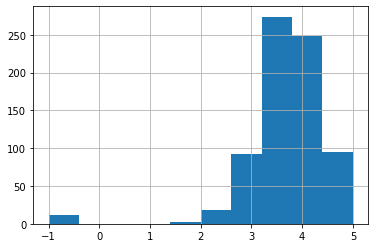

In [124]:
p_df.Rating.hist()

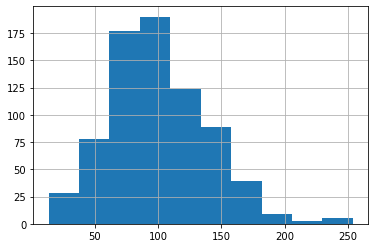

In [125]:
p_df.avg_salary.hist()

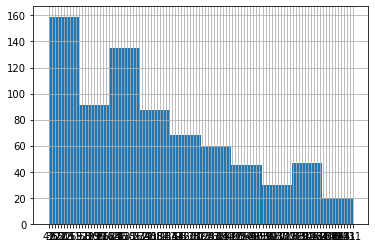

In [126]:
p_df.age.hist()

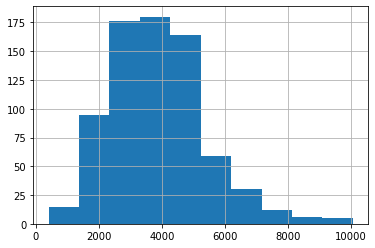

In [127]:
p_df.desc_len.hist()

In [128]:
#p_df.boxplot(column = ['age','avg_salary','Rating'])

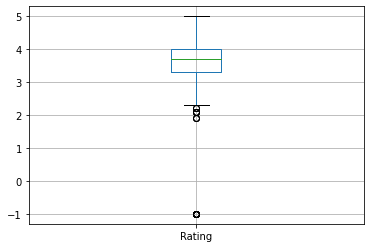

In [129]:
p_df.boxplot(column = 'Rating')

In [130]:
p_df[['age','avg_salary','Rating','desc_len']].corr()

,avg_salary,Rating,desc_len
avg_salary,1.000000,0.013492,0.078875
Rating,0.013492,1.000000,-0.012215
desc_len,0.078875,-0.012215,1.000000


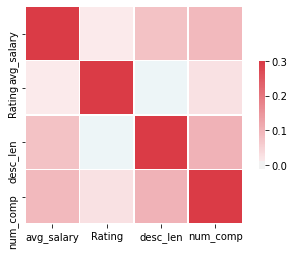

In [131]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(p_df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [132]:
p_df.columns = (p_df.columns.str.strip().str.upper()
              .str.replace(' ', '_')
              .str.replace('(', '')
              .str.replace(')', ''))

In [133]:
p_df.columns

Index(['JOB_TITLE', 'SALARY_ESTIMATE', 'JOB_DESCRIPTION', 'RATING',
       'COMPANY_NAME', 'LOCATION', 'HEADQUARTERS', 'SIZE', 'FOUNDED',
       'TYPE_OF_OWNERSHIP', 'INDUSTRY', 'SECTOR', 'REVENUE', 'COMPETITORS',
       'HOURLY', 'EMPLOYER_PROVIDED', 'SALARY', 'SALARY1', 'MIN_SALARY',
       'MAX_SALARY', 'AVG_SALARY', 'JOB_STATE', 'SAME_STATE', 'AGE',
       'PYTHON_YN', 'R_YN', 'SPARK_YN', 'AWS_YN', 'EXCEL_YN', 'JOB_SIMP',
       'SENIORITY', 'DESC_LEN', 'NUM_COMP'],
      dtype='object')

In [134]:
#df_cat = p_df['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 
#'job_state','same_state', 'python_yn', 'R_yn','spark', 'aws', 'excel', 'job_simp', 'seniority']

df_cat = p_df[['LOCATION', 'HEADQUARTERS', 'SIZE','TYPE_OF_OWNERSHIP', 'INDUSTRY', 'SECTOR', 'REVENUE','JOB_STATE', 
               'SAME_STATE','PYTHON_YN', 'R_YN', 'SPARK_YN', 'AWS_YN', 'EXCEL_YN', 'JOB_SIMP','SENIORITY']]

In [135]:
df_cat.head(4)

,LOCATION,HEADQUARTERS,SIZE,TYPE_OF_OWNERSHIP,INDUSTRY,SECTOR,REVENUE,JOB_STATE,SAME_STATE,PYTHON_YN,R_YN,SPARK_YN,AWS_YN,EXCEL_YN,JOB_SIMP,SENIORITY
0,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),NM,0,1,0,0,0,1,data scientist,na
1,"Linthicum, MD","Baltimore, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),MD,0,1,0,0,0,0,data scientist,na
2,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),FL,1,1,0,1,0,1,data scientist,na
3,"Richland, WA","Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),WA,1,1,0,0,0,0,data scientist,na


In [136]:
df_cat.LOCATION.value_counts()

New York, NY                         55
San Francisco, CA                    49
Cambridge, MA                        47
Chicago, IL                          32
Boston, MA                           23
San Jose, CA                         13
Pittsburgh, PA                       12
Rockville, MD                        11
Washington, DC                       11
Herndon, VA                          10
Winston-Salem, NC                    10
Richland, WA                         10
San Diego, CA                         9
Indianapolis, IN                      9
Austin, TX                            8
Mountain View, CA                     8
South San Francisco, CA               8
Palo Alto, CA                         7
Rochester, NY                         7
Marlborough, MA                       6
Gaithersburg, MD                      6
Salt Lake City, UT                    6
Dallas, TX                            6
Phoenix, AZ                           6
Chantilly, VA                         6


In [137]:
len(df_cat.LOCATION.value_counts())

200

In [138]:
print("graph for %s: total = %d" % (df_cat.LOCATION, len(df_cat.LOCATION.value_counts())))

graph for 0      Albuquerque, NM
1        Linthicum, MD
2       Clearwater, FL
3         Richland, WA
4         New York, NY
            ...       
737      Cambridge, MA
738      Nashville, TN
739     Pittsburgh, PA
740      Allentown, PA
741    Beavercreek, OH
Name: LOCATION, Length: 742, dtype: object: total = 200


graph for LOCATION: total = 200


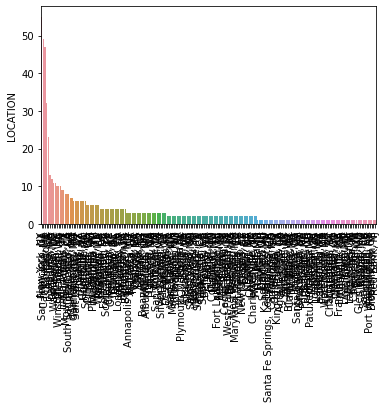

graph for HEADQUARTERS: total = 198


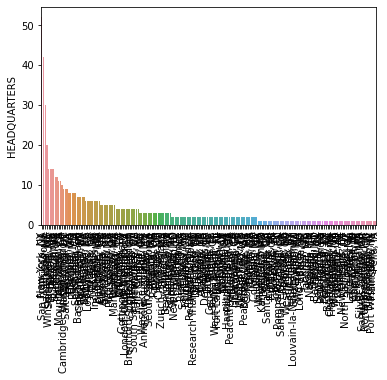

graph for SIZE: total = 9


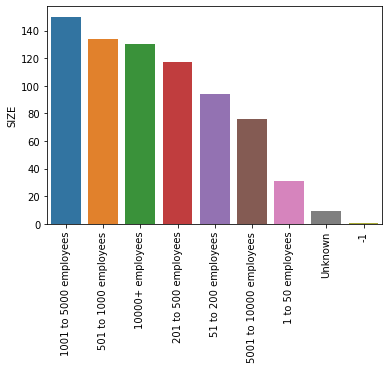

graph for TYPE_OF_OWNERSHIP: total = 11


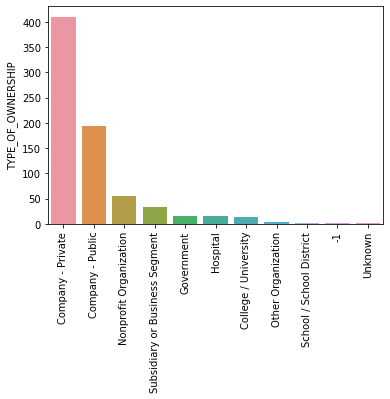

graph for INDUSTRY: total = 60


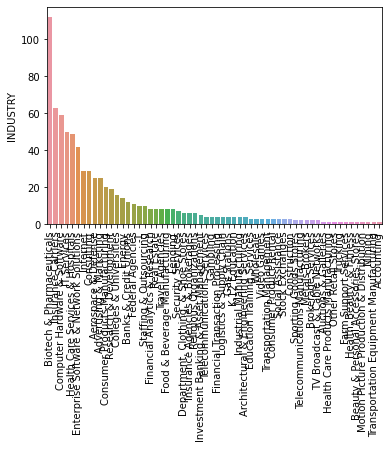

graph for SECTOR: total = 25


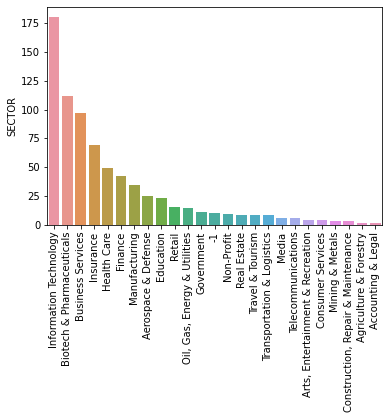

graph for REVENUE: total = 14


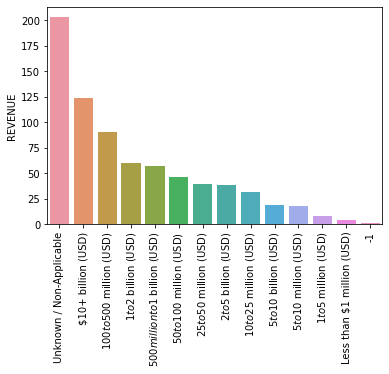

graph for JOB_STATE: total = 37


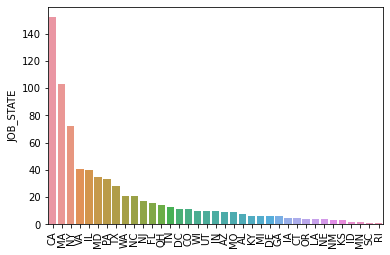

graph for SAME_STATE: total = 2


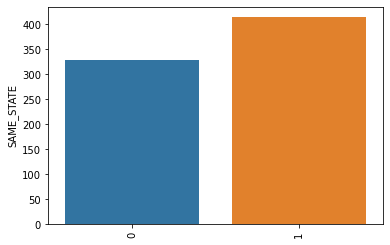

graph for PYTHON_YN: total = 2


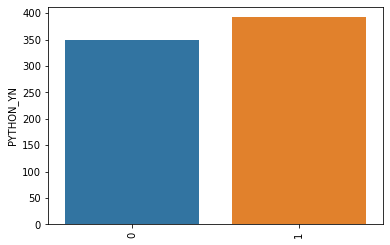

graph for R_YN: total = 2


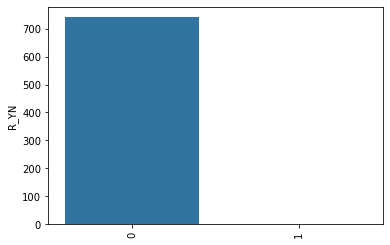

graph for SPARK_YN: total = 2


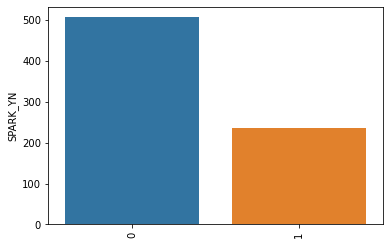

graph for AWS_YN: total = 2


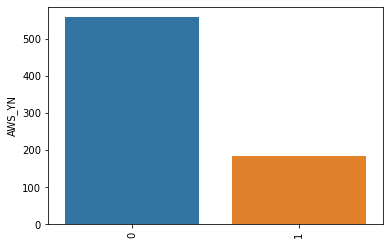

graph for EXCEL_YN: total = 2


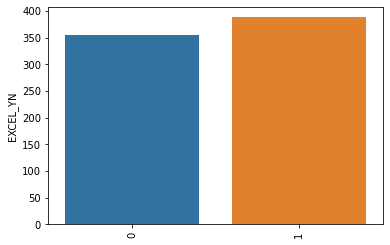

graph for JOB_SIMP: total = 7


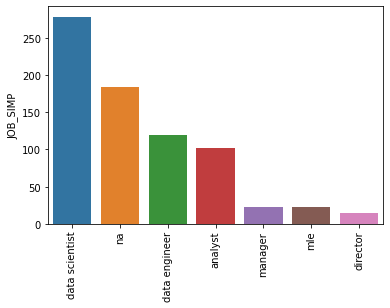

graph for SENIORITY: total = 3


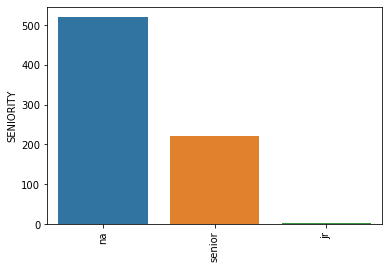

In [139]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for LOCATION: total = 20


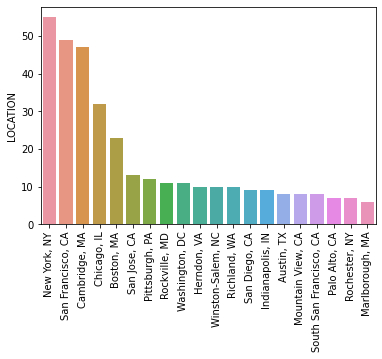

graph for HEADQUARTERS: total = 20


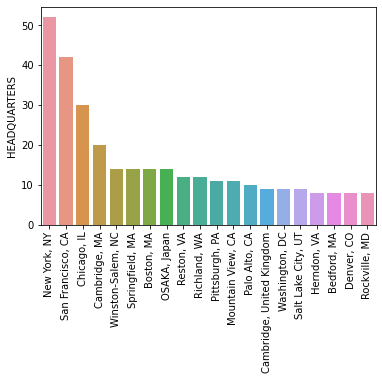

In [140]:
for i in df_cat[['LOCATION','HEADQUARTERS']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [141]:
pd.pivot_table(p_df, index = 'JOB_SIMP', values = 'AVG_SALARY')

,AVG_SALARY
JOB_SIMP,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [142]:
pd.pivot_table(p_df, index = ['JOB_SIMP','SENIORITY'], values = 'AVG_SALARY')

AVG_SALARY
JOB_SIMP       SENIORITY            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [143]:
pd.pivot_table(p_df, index = ['JOB_STATE','JOB_SIMP'], values = 'AVG_SALARY').sort_values('JOB_STATE', ascending = False)

AVG_SALARY
JOB_STATE JOB_SIMP                  
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
          analyst          54.500000
VA        na               79.300000
          mle              87.000000
          data scientist  108.416667
          data engineer    96.900000
          analyst          71.583333
UT        data engineer   100.333333
          analyst          54.750000
          data scientist  140.500000
TX        na               41.285714
          data scientist  100.730769
          data engineer   113.062500
TN        data scientist   96.000000
          data engineer   100.950000
          analyst          13.500000
SC        na               60.500000
RI        analyst         100.000000
PA        manager         109.666667
          data engineer    91.500000
          data scientist  113.333333
          analyst          62.750000
          mle             120.500000
          na               76.062500
OR        data scientist   98.500000
          data engineer    73.000000
OH        na               91.166667
          data scientist  105.285714
          analyst          53.875000
NY        na               81.583333
          mle             125.000000
          data scientist  115.250000
          data engineer    86.375000
          analyst          65.607143
NM        data scientist   74.333333
NJ        data scientist  106.875000
          analyst          83.583333
          data engineer   112.000000
          manager         109.500000
          director        161.500000
          na               82.500000
NE        na               41.000000
NC        na               90.916667
          data scientist  117.000000
          data engineer   104.250000
MO        na               72.333333
          manager          40.500000
          data scientist  127.666667
          analyst          61.000000
MN        data engineer    95.000000
          analyst          76.000000
MI        manager          87.500000
          data scientist  106.625000
MD        na               88.750000
          data scientist  109.115385
          data engineer   109.000000
          analyst          80.666667
MA        na              107.478261
          manager          71.900000
          director        117.833333
          data scientist  113.750000
          data engineer   107.291667
          analyst          59.125000
LA        analyst          48.000000
          data engineer    70.500000
          na               20.000000
KY        na              103.500000
          data scientist   84.000000
KS        mle              87.000000
IN        na               69.000000
          data scientist   84.500000
          data engineer   114.500000
IL        analyst          66.500000
          na               57.166667
          mle             133.000000
          director        221.750000
          data scientist  117.233333
          data engineer    96.125000
ID        analyst          56.250000
IA        analyst          43.000000
          data engineer   102.833333
GA        data scientist   81.333333
          na               80.000000
FL        data scientist   97.357143
          data engineer    91.833333
          analyst          47.500000
DE        na               27.500000
DC        data scientist  149.000000
          data engineer    85.000000
          analyst          63.500000
CT        na               62.500000
          data scientist   84.000000
CO        mle             100.500000
          data engineer    99.000000
          analyst          29.500000
          na               31.500000
          data scientist  108.666667
CA        na               99.907407
          mle             177.300000
          manager          80.611111
          data scientist  142.522059
          data engineer   129.540000
          analyst          85.

In [144]:
print(pd.options.display.max_rows)
print(pd.set_option('display.max_rows', None))

500
None


In [145]:
pd.pivot_table(p_df, index = ['JOB_STATE','JOB_SIMP'], values = 'AVG_SALARY', aggfunc = 'count').sort_values('JOB_STATE', ascending = False)

AVG_SALARY
JOB_STATE JOB_SIMP                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [146]:
pd.pivot_table(p_df[p_df.JOB_SIMP=='data scientist'], index = 'JOB_STATE', values = 'AVG_SALARY').sort_values('AVG_SALARY', ascending = False)

,AVG_SALARY
JOB_STATE,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [147]:
p_df.columns

Index(['JOB_TITLE', 'SALARY_ESTIMATE', 'JOB_DESCRIPTION', 'RATING',
       'COMPANY_NAME', 'LOCATION', 'HEADQUARTERS', 'SIZE', 'FOUNDED',
       'TYPE_OF_OWNERSHIP', 'INDUSTRY', 'SECTOR', 'REVENUE', 'COMPETITORS',
       'HOURLY', 'EMPLOYER_PROVIDED', 'SALARY', 'SALARY1', 'MIN_SALARY',
       'MAX_SALARY', 'AVG_SALARY', 'JOB_STATE', 'SAME_STATE', 'AGE',
       'PYTHON_YN', 'R_YN', 'SPARK_YN', 'AWS_YN', 'EXCEL_YN', 'JOB_SIMP',
       'SENIORITY', 'DESC_LEN', 'NUM_COMP'],
      dtype='object')

In [148]:
df_pivots = p_df[['RATING', 'INDUSTRY', 'SECTOR', 'REVENUE',  'NUM_COMP', 'HOURLY', 'EMPLOYER_PROVIDED', 'PYTHON_YN', 'R_YN', 
                'SPARK_YN','AWS_YN', 'EXCEL_YN','TYPE_OF_OWNERSHIP','AVG_SALARY']]

In [149]:
df_pivots.head(3)

,RATING,INDUSTRY,SECTOR,REVENUE,NUM_COMP,HOURLY,EMPLOYER_PROVIDED,PYTHON_YN,R_YN,SPARK_YN,AWS_YN,EXCEL_YN,TYPE_OF_OWNERSHIP,AVG_SALARY
0,3.8,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,1,0,0,0,1,Company - Private,72.0
1,3.4,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,1,0,0,0,0,Other Organization,87.5
2,4.8,Security Services,Business Services,$100 to $500 million (USD),0,0,0,1,0,1,0,1,Company - Private,85.0


In [150]:
for i in df_pivots.columns:
    if(i != 'AVG_SALARY'):
        print('Pivot table for column :- ',i)
        print(pd.pivot_table(df_pivots,index =i, values = 'AVG_SALARY').sort_values('AVG_SALARY', ascending = False), '\n\n')

Pivot table for column :-  RATING
        AVG_SALARY
RATING            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286 


Pivot table for column :-  INDUSTRY
                                          AVG_SALARY
INDUSTRY                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness          

In [151]:
pd.pivot_table(df_pivots, index = 'REVENUE', columns = 'PYTHON_YN', values = 'AVG_SALARY', aggfunc = 'count')

PYTHON_YN,0,1
REVENUE,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [152]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [153]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Shalendra
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Shalendra
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

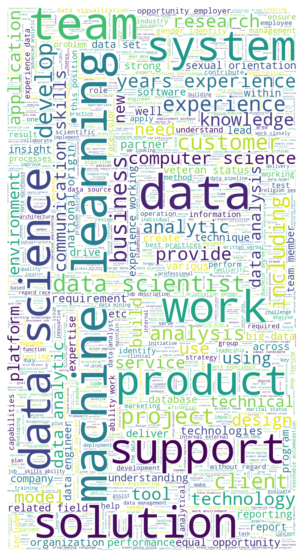

In [154]:
words = " ".join(p_df['JOB_DESCRIPTION'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()


In [155]:
p_df.shape

(742, 33)